In [1]:
import pandas as pd
import database as db
import betSim as bs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
df_testing = pd.read_sql_query('SELECT * FROM games WHERE tournamentID = 1', db.engine)


In [2]:
all_keys = ['banList','isFirstOfMatch','isLastOfMatch','isSecondOfMatch','isNotFirstOfMatch','AvgTotalKillsLessThan']
all_bet_types = ['kills','dragons','barons','tower','gameTime']
keys = []
betTypes = ['kills']
df_top10_keys, count = bs.bestKeysSim(df_testing, keys,betTypes)
print(f'number of sims done: {str(count)}')

number of sims done: 6


In [3]:
bs.printSim(df_top10_keys,0)


outcome: 
units: 124.06999999999978
wins: 129
loses: 83
total bets: 212
winrate: 0.61
choice: under
key set: []
exclude list: []


In [4]:
df_top10_keys

,units,wins,loses,totalbets,winrate,unitsovertime,banList,KeySet,betType,choice
0,124.07,129,83,212,0.61,"[100.0, 99.0, 99.83, 98.83, 99.66, 100.49, 99....",[],[],kills,under
1,38.06,82,130,212,0.39,"[100.0, 99.0, 98.0, 98.83, 97.83, 96.83, 97.66...",[],[],kills,over


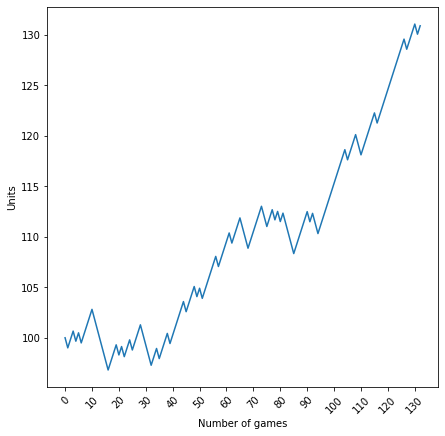

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.plot(df_top10_keys['unitsovertime'][0])
ax.set_xlabel('Number of games')
ax.set_ylabel('Units')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='x', rotation=45)

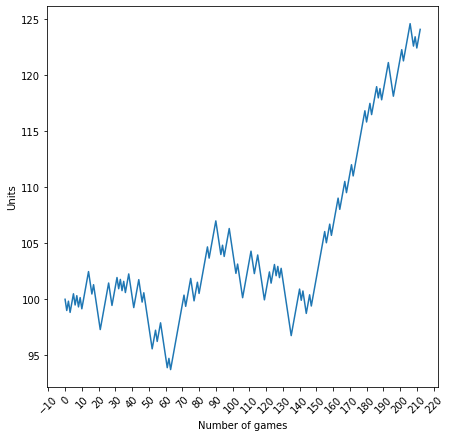

In [9]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
ax.plot(df_top10_keys['unitsovertime'][1])
ax.set_xlabel('Number of games')
ax.set_ylabel('Units')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='x', rotation=45)

In [3]:
df_numbers = pd.read_sql_query('SELECT * FROM tournaments', db.engine)
df_numbers

,tournamentID,tournament_name,year,region
0,1,LCK_Spring_2022,2022,LCK
1,2,LCK_Spring_Playoffs_2022,2022,LCK
2,3,LPL_Spring_2022,2022,LPL
3,4,LPL_Spring_Playoffs_2022,2022,LPL
4,5,LEC_Spring_2022,2022,LEC
5,6,LEC_Spring_Playoffs_2022,2022,LEC
6,7,LCS_Spring_2022,2022,LCS
7,8,LCS_Spring_Playoffs_2022,2022,LCS
8,9,MSI_2022,2022,MSI
9,10,LCK_Summer_2022,2022,LCK


In [6]:
oddsTable = pd.read_sql_query('SELECT * FROM oddsTable', db.engine)
oddsTable

,gameID,kills_num,kills_odds,dragons_num,dragons_odds,towers_num,towers_odds,barons_num,barons_odds,time_num,time_odds,winner_teamName,winner_odds
